This notebook reproduces the timepoint-by-timepoint recall temporal correlation matrices

## Imports

In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from os.path import join as opj
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

## Functions

In [2]:
def draw_bounds(ax, model):
    bounds = np.where(np.diff(np.argmax(model.segments_[0], axis=1)))[0]
    bounds_aug = np.concatenate(([0],bounds,[model.segments_[0].shape[0]]))
    for i in range(len(bounds_aug)-1):
        rect = patches.Rectangle((bounds_aug[i], bounds_aug[i]), bounds_aug[i+1]-bounds_aug[i], 
                                 bounds_aug[i+1]-bounds_aug[i], linewidth=1, edgecolor='#FFF9AE', 
                                 facecolor='none')
        ax.add_patch(rect)
    return ax

## Paths & parameters

In [3]:
datadir = '../../../data/processed/'
figdir = '../../../paper/figs/'

sns.set_context('paper')
cmap = plt.cm.bone_r
mpl.rcParams['pdf.fonttype'] = 42

## Load the data

In [4]:
video_model, recall_models = np.load(opj(datadir, 'models_t100_v50_r10.npy'), allow_pickle=True)
boundary_models = np.load(opj(datadir, 'recall_eventseg_models'), allow_pickle=True)

## Compute correlation matrices

In [5]:
corrmats = [1 - cdist(r, r, 'correlation') for r in recall_models]

## Plot figure

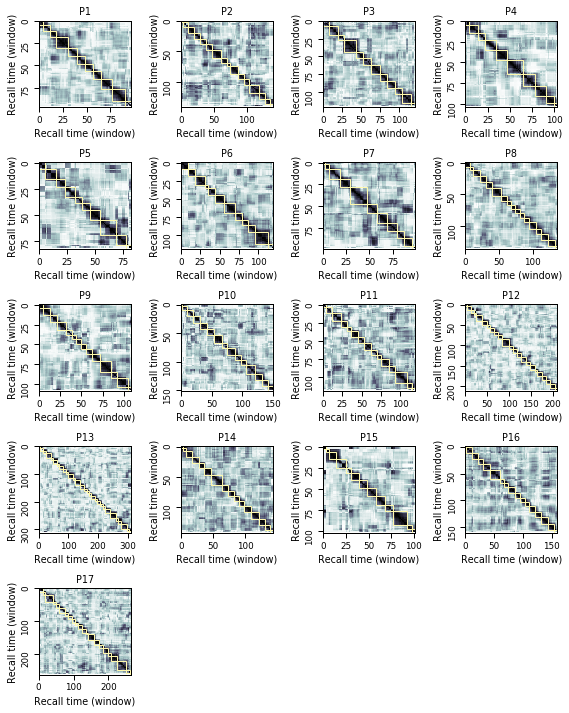

In [15]:
fig, axarr = plt.subplots(5, 4)
axarr = axarr.flatten()
fig.set_size_inches(8, 10)

for i, (c, ax, b) in enumerate(zip(corrmats, axarr, boundary_models)):
    data = pd.DataFrame(c)
    if len(c) > 250:
        tick_freq = 100
    elif len(c) > 125:
        tick_freq = 50
    else:
        tick_freq = 25
    a = sns.heatmap(data, cmap=cmap, xticklabels=tick_freq, yticklabels=tick_freq, 
                    vmin=0, vmax=1, ax=ax, cbar=False)
    a.set_ylabel('Recall time (window)')
    a.set_xlabel('Recall time (window)')
    a.set_title(f'P{i + 1}')
    
    for _, spine in a.spines.items():
        spine.set_visible(True)
        
    a.collections[0].remove()
    a.imshow(data, aspect='auto', cmap=cmap)
        
    draw_bounds(ax, b)
        
axarr[17].axis('off')
axarr[18].axis('off')
axarr[19].axis('off')
plt.tight_layout()
# plt.savefig(opj(figdir, 'corrmats.pdf'))
plt.show()